In [1]:
#Married At First Site
"""The Lifetime reality television show and social experiment, Married at First Sight, 
features men and women who sign up to marry a complete stranger they've never met before. 
Experts pair couples based on tests and interviews. 
After marriage, couples have only a few short weeks together to decide if they want to stay married or get a divorce. 
There have been 10 full seasons so far which provides interesting data to look at what factors may or may not 
play a role in their 
decisions at the end of eight weeks as well as longer-term outcomes since the show aired."""

"The Lifetime reality television show and social experiment, Married at First Sight, \nfeatures men and women who sign up to marry a complete stranger they've never met before. \nExperts pair couples based on tests and interviews. \nAfter marriage, couples have only a few short weeks together to decide if they want to stay married or get a divorce. \nThere have been 10 full seasons so far which provides interesting data to look at what factors may or may not \nplay a role in their \ndecisions at the end of eight weeks as well as longer-term outcomes since the show aired."

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mafs=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/Married/married-at-first-sight/mafs.csv")
mafs.head()

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0


In [4]:
#lets get shape and size and more
print(mafs.shape)
print(mafs.ndim)
print(mafs.size)
print(mafs.columns)

(68, 17)
2
1156
Index(['Couple', 'Season', 'Location', 'Name', 'Age', 'Gender', 'Occupation',
       'Decision', 'Status', 'DrPepperSchwartz', 'DrLoganLevkoff',
       'DrJosephCilona', 'ChaplainGregEpstein', 'PastorCalvinRoberson',
       'RachelDeAlto', 'DrJessicaGriffin', 'DrVivianaColes'],
      dtype='object')


In [5]:
#lets know unique values of the tables.

def uniqueincsv(data):
    for i in data:
        print(i,"=",data[i].unique(),end="\n\n")

In [6]:
uniqueincsv(mafs)

Couple = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]

Season = [ 1  2  3  4  5  6  7  8  9 10]

Location = ['New York City and Northern New Jersey' 'Atlanta, Georgia'
 'South Florida' 'Chicago, Illinois' 'Boston, Massachusetts'
 'Dallas, Texas' 'Philadelphia, Pennsylvania' 'Charlotte, North Carolina'
 'Washington D.C.']

Name = ['Jamie Otis-Hehner' 'Doug Hehner' 'Cortney Hendrix' 'Jason Carrion'
 'Monet Bell' 'Vaughn Copeland' 'Jaclyn Methuen' 'Ryan Ranellone'
 'Davina Kullar (now Davis)' 'Sean Varricchio' 'Jessica Castro'
 'Ryan DeNino/Oehl' 'Vanessa Nelson' 'Tres Russell' 'Ashley Doherty'
 'David Norton' 'Samantha Role' 'Neil Bowlus' 'Sonia Granados'
 'Nick Pendergrast' 'Heather Seidel' 'Derek Schwartz' 'Lillian Vilchez'
 'Tom Wilson' 'Danielle DeGroot' 'Cody Knapek' 'Sheila Downs' 'Nate Duhon'
 'Ashley Petta' "Anthony D'Amico" 'Shawniece Jackson' 'Jephte Pierre'
 'Molly Duff' 'Jonathan Francetic' 'Jaclyn Schwartzberg' 'Rya

In [7]:
#lets make a deep copy first
mafs1=mafs.copy(deep=True)

(1, 10)

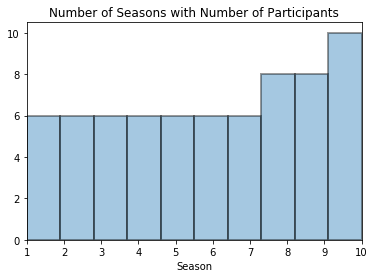

In [8]:
#lets see the number of participants in each season using a histogram
plt.figure()
g=sns.distplot(mafs1["Season"], kde=False, bins=10, hist_kws=dict(edgecolor="k", linewidth=2))
g.set_title("Number of Seasons with Number of Participants")
plt.xlim([1,10])

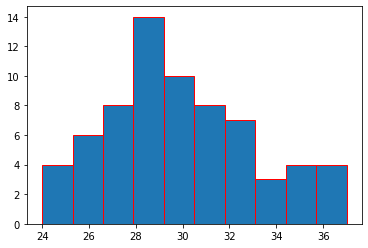

In [9]:
#Lets see the age variation using a histogram
plt.figure()
A=plt.hist(mafs1["Age"], edgecolor="red")

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

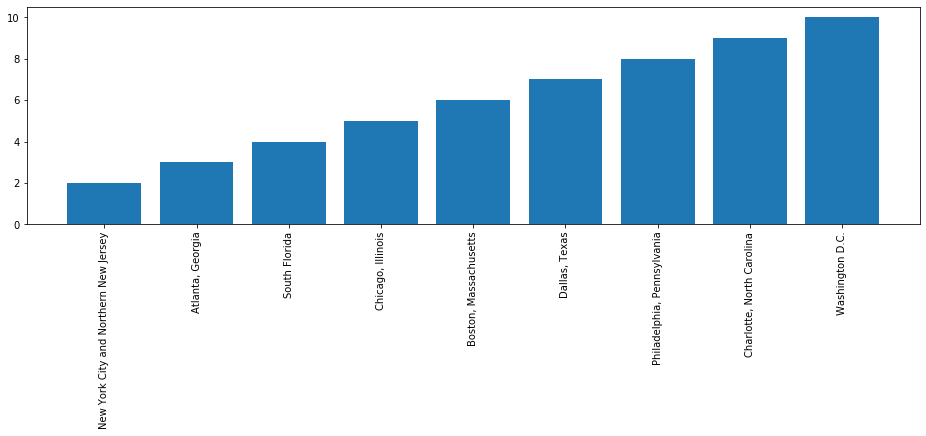

In [10]:
#lets see in which city, a particular season was shot.
#We will achieve this by making a bar chat
plt.figure(figsize=(16,4))
m=plt.bar(mafs1["Location"], mafs1["Season"])
plt.xticks(rotation=90)

In [11]:
#Decision leads to status, if both Male and Female agrees, the they stay married.
#If either disagrees, then both get divorced
#Let us see how many males and females said yes or no. 
#I am gonna convert decision column into dummy
dummydes=pd.get_dummies(mafs1["Decision"])
dummydes

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
63,1,0
64,1,0
65,0,1
66,1,0


In [12]:
mafs1=pd.concat([mafs1,dummydes], axis=1)
mafs1.drop(["No","Decision"], inplace=True, axis=1)
mafs1

,Couple,Season,Location,Name,Age,Gender,Occupation,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes,Yes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Married,1,1,1,1,0,0,0,0,1
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Married,1,1,1,1,0,0,0,0,1
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Divorced,1,1,1,1,0,0,0,0,1
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Divorced,1,1,1,1,0,0,0,0,1
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,Divorced,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,32,10,Washington D.C.,Brandon Reid,34,M,Sales Manager,Divorced,1,0,0,0,1,0,0,1,0
64,33,10,Washington D.C.,Meka Jones,25,F,Category Analyst,Divorced,1,0,0,0,1,0,0,1,0
65,33,10,Washington D.C.,Michael Watson,31,M,Education Director,Divorced,1,0,0,0,1,0,0,1,1
66,34,10,Washington D.C.,Mindy Shiben,34,F,Figure Skating Coach,Divorced,1,0,0,0,1,0,0,1,0


1    48
0    20
Name: Yes, dtype: int64


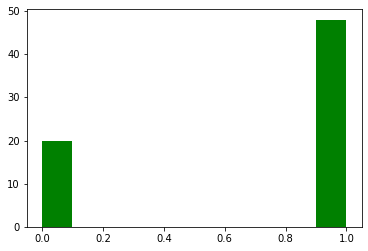

In [13]:
#Yes=1 and No=0, I have removed Decision column as well as No column
#Now lets see how many people said 1 or 0
plt.hist(mafs1["Yes"], color="green")
print(mafs1["Yes"].value_counts())

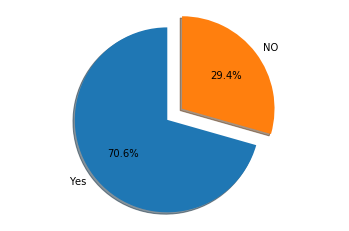

In [14]:
#A better represestation using pie chart
labels="Yes","NO"
sizes=mafs1["Yes"].value_counts()
explode=(0,0.2)
fig, ax=plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

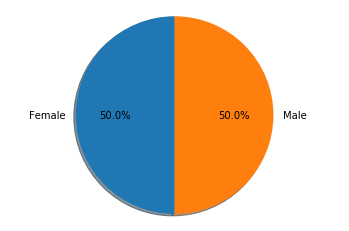

In [15]:
#showing pie chart for % of M and female
lables="Female","Male"
sizes=mafs1["Gender"].value_counts()
explode=(0,0)
fig, ax=plt.subplots()
ax.pie(sizes, explode=explode, labels=lables, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [16]:
maleyes=0
maleno=0
femaleyes=0
femaleno=0
for i in mafs1.index:
    if mafs1["Gender"][i]=="M" and mafs1["Yes"][i]==1:
        maleyes+=1
    elif mafs1["Gender"][i]=="M" and mafs1["Yes"][i]==0:
        maleno+=1
    elif mafs1["Gender"][i]=="F" and mafs1["Yes"][i]==1:
        femaleyes+=1
    elif mafs1["Gender"][i]=="F" and mafs1["Yes"][i]==0:
        femaleno+=1
    else:
        continue
        
print("{0} {1} {2} {3}".format(maleyes, maleno, femaleyes, femaleno))

24 10 24 10


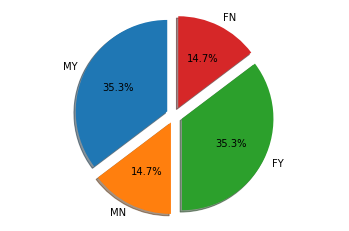

In [18]:
#pie chart representation of males and females saying yes and no respectively
lables="MY","MN", "FY", "FN"
sizes=[maleyes,maleno,femaleyes,femaleno]
explode=(0.09,0.09,0.09,0.09)
fig, ax=plt.subplots()
ax.pie(sizes, explode=explode, labels=lables, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

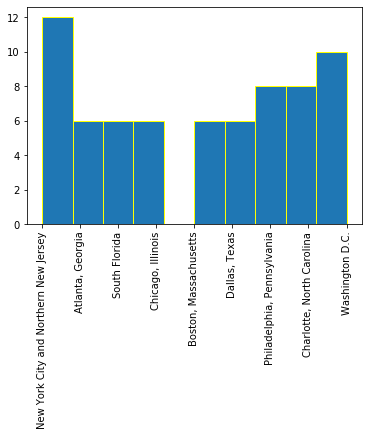

In [22]:
#Lets print nuber of participant from each city
a=plt.hist(mafs1["Location"], edgecolor="yellow")
plt.xticks(rotation=90)